<a href="https://colab.research.google.com/github/Imama-Kainat/ByteWise-MLDL/blob/main/LosAnglesCrimeRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

The Data
They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

crimes.csv
Column	Description
'DR_NO'	Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits.
'Date Rptd'	Date reported - MM/DD/YYYY.
'DATE OCC'	Date of occurrence - MM/DD/YYYY.
'TIME OCC'	In 24-hour military time.
'AREA NAME'	The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
'Crm Cd Desc'	Indicates the crime committed.
'Vict Age'	Victim's age in years.
'Vict Sex'	Victim's sex: F: Female, M: Male, X: Unknown.
'Vict Descent'	Victim's descent:
A - Other Asian
B - Black
C - Chinese
D - Cambodian
F - Filipino
G - Guamanian
H - Hispanic/Latin/Mexican
I - American Indian/Alaskan Native
J - Japanese
K - Korean
L - Laotian
O - Other
P - Pacific Islander
S - Samoan
U - Hawaiian
V - Vietnamese
W - White
X - Unknown
Z - Asian Indian
'Weapon Desc'	Description of the weapon used (if applicable).
'Status Desc'	Crime status.
'LOCATION'	Street address of the crime.

In [5]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset and parse date columns
data = pd.read_csv('/DATASET.csv.xls', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})
data.head()





<ipython-input-5-c004f84a79f1>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/DATASET.csv.xls', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})
<ipython-input-5-c004f84a79f1>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/DATASET.csv.xls', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL
4,191921269,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST


In [6]:
data.describe()

,DR_NO,Date Rptd,DATE OCC,Vict Age
count,1.000000e+04,10000,10000,10000.000000
mean,2.011876e+08,2020-05-13 22:47:42.720000,2020-04-27 00:34:50.880000,32.685600
min,1.030447e+07,2020-01-01 00:00:00,2020-01-01 00:00:00,-1.000000
25%,2.003045e+08,2020-01-23 00:00:00,2020-01-21 00:00:00,21.000000
50%,2.005088e+08,2020-03-09 00:00:00,2020-03-02 00:00:00,33.000000
75%,2.010104e+08,2020-08-13 00:00:00,2020-07-30 00:00:00,48.000000
max,2.221089e+08,2022-08-20 00:00:00,2020-12-31 00:00:00,99.000000
std,3.486707e+06,NaN,NaN,21.116073


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DR_NO         10000 non-null  int64         
 1   Date Rptd     10000 non-null  datetime64[ns]
 2   DATE OCC      10000 non-null  datetime64[ns]
 3   TIME OCC      10000 non-null  object        
 4   AREA NAME     10000 non-null  object        
 5   Crm Cd Desc   10000 non-null  object        
 6   Vict Age      10000 non-null  int64         
 7   Vict Sex      9151 non-null   object        
 8   Vict Descent  9151 non-null   object        
 9   Weapon Desc   2371 non-null   object        
 10  Status Desc   10000 non-null  object        
 11  LOCATION      10000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 937.6+ KB


In [8]:
# Extract the hour from the 'TIME OCC' column
data['HOUR OCC'] = data['TIME OCC'].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,22
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,33
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST,12
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL,17
4,191921269,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST,41


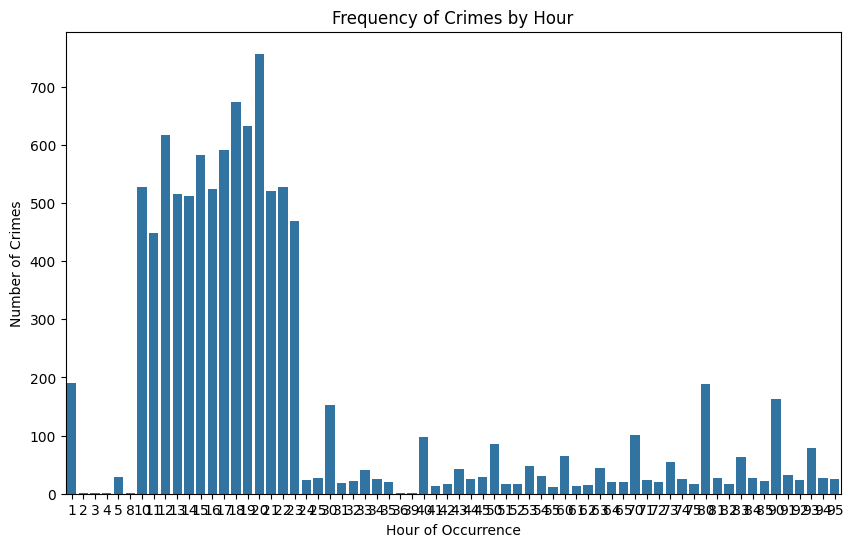

The hour with the highest frequency of crimes is 20
The area with the largest volume of night crime is Harbor
Age Bracket
0-17      187
18-25    1232
26-34    2004
35-44    1730
45-54    1276
55-64    1043
65+       626
Name: count, dtype: int64


In [10]:
# Produce a countplot to find the largest frequency of crimes by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='HOUR OCC')
plt.title('Frequency of Crimes by Hour')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Number of Crimes')
plt.show()

# Find the peak crime hour
peak_crime_hour = data['HOUR OCC'].mode()[0]
print(f"The hour with the highest frequency of crimes is {peak_crime_hour}")

# Filter for the night-time hours (10pm to 3:59am)
night_time = data[data['HOUR OCC'].isin([22, 23, 0, 1, 2, 3])]

# Group by 'AREA NAME' and count occurrences, find the area with the highest night-time crimes
peak_night_crime_location = night_time.groupby('AREA NAME', as_index=False)['DR_NO'].count().sort_values('DR_NO', ascending=False).iloc[0]['AREA NAME']
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column for age brackets
data['Age Bracket'] = pd.cut(data['Vict Age'], bins=age_bins, labels=age_labels)

# Count occurrences of each age bracket
victim_ages = data['Age Bracket'].value_counts().sort_index()

# Print the victim age distribution
print(victim_ages)




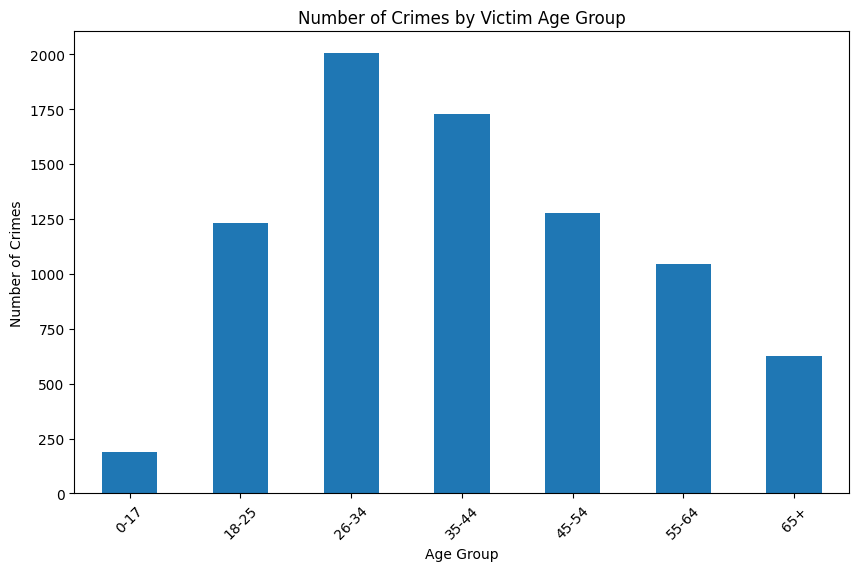

In [11]:
# Plot the distribution of crimes by victim age group
plt.figure(figsize=(10, 6))
victim_ages.plot(kind='bar')
plt.title('Number of Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()